In [ ]:
pip install seaborn

***01 - Distribution Plots***

In [2]:
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


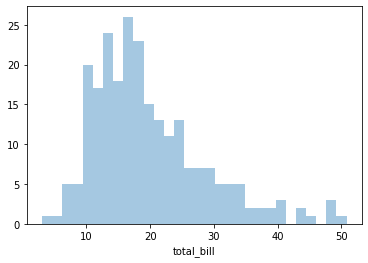

In [8]:
sns.distplot(tips['total_bill'],kde = False, bins = 30)

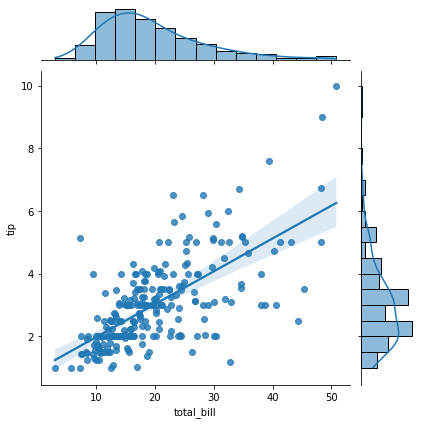

In [14]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

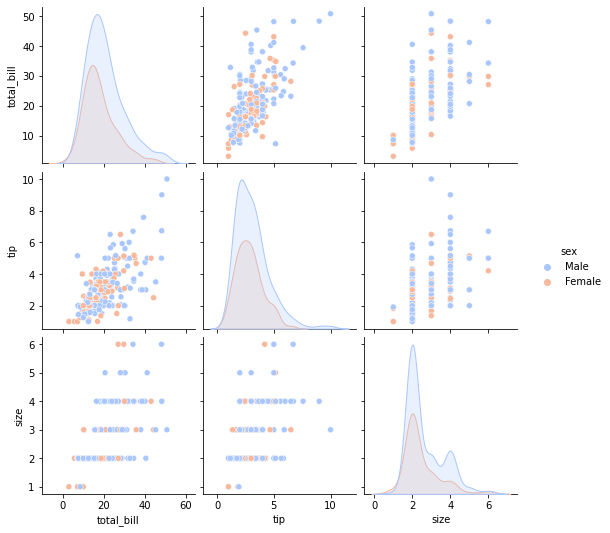

In [17]:
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm') # hue: categorical

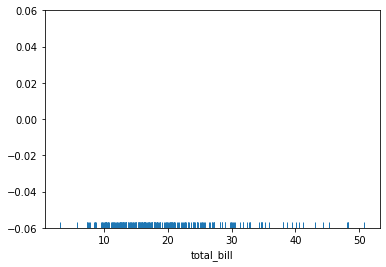

In [18]:
sns.rugplot(tips['total_bill'])

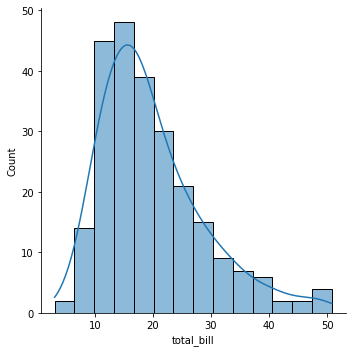

In [5]:
sns.displot(tips['total_bill'], kde = True)

(0.0, 1.0)

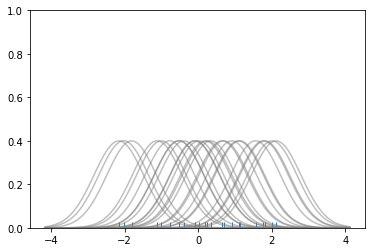

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset)

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:

  # Create a kernel for each point and append to list
  kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
  kernel_list.append(kernel)

  # Scale for plotting
  kernel = kernel / kernel.max()
  kernel = kernel * .4
  plt.plot(x_axis,kernel,color = 'grey',alpha = 0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

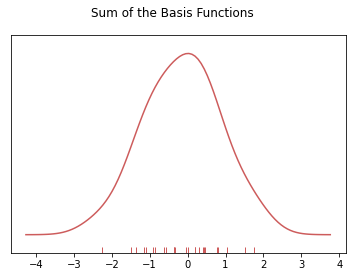

In [24]:
# To get the kde plot we can sum these basis functions

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis = 0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color = 'indianred')

# Add the initial regplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

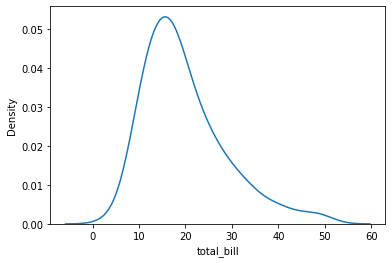

In [26]:
sns.kdeplot(tips['total_bill'])

***02 - Categorical Plots***

In [1]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
import numpy as np

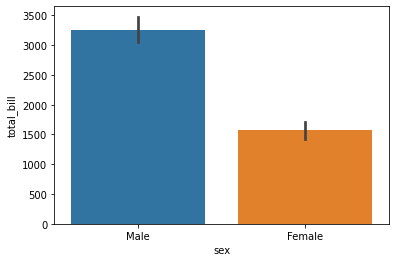

In [6]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.sum) # x:categorical y:numeric

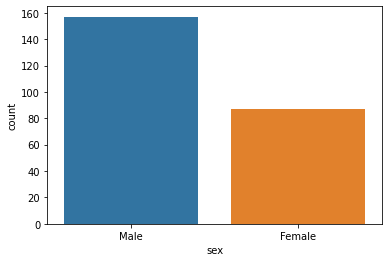

In [7]:
sns.countplot(x = 'sex',data = tips)

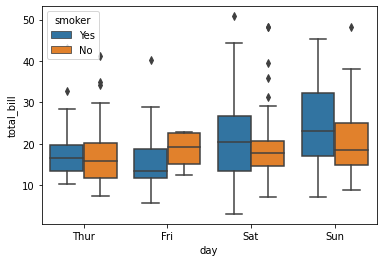

In [9]:
sns.boxplot(x = 'day',y = 'total_bill',data = tips, hue = 'smoker')

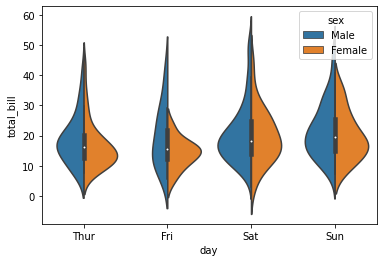

In [8]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


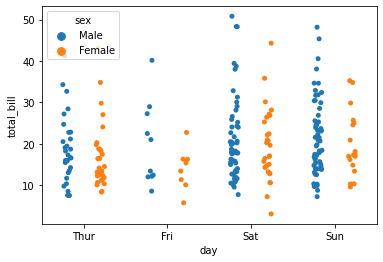

In [12]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex', split = True)

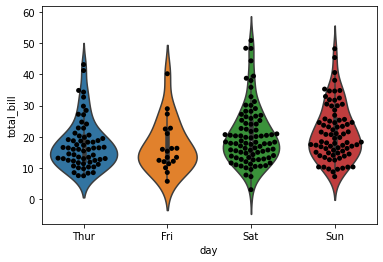

In [15]:
sns.violinplot(x = 'day', y = 'total_bill',data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'black')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


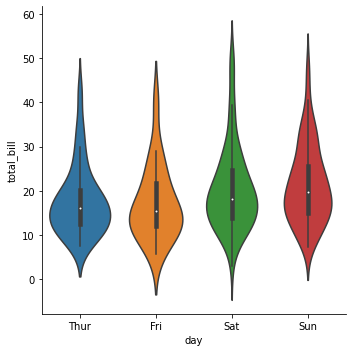

In [17]:
sns.factorplot(x = 'day', y = 'total_bill',data = tips, kind = 'violin')

***03 - Matrix Plots***

In [18]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [24]:
tc = tips.corr()

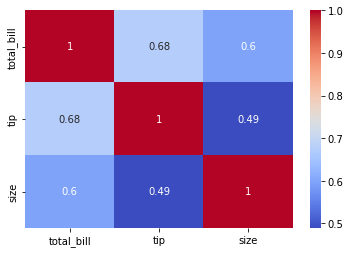

In [28]:
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

In [32]:
fp = flights.pivot_table(index = 'month',columns = 'year', values = 'passengers')

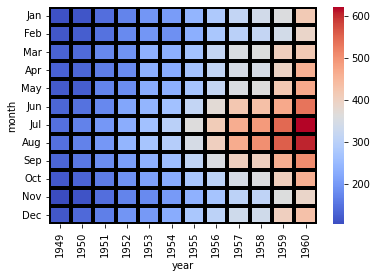

In [38]:
sns.heatmap(fp,cmap = 'coolwarm', linecolor = 'black', linewidths = 3)

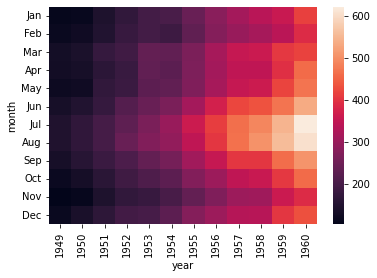

In [39]:
sns.heatmap(fp)

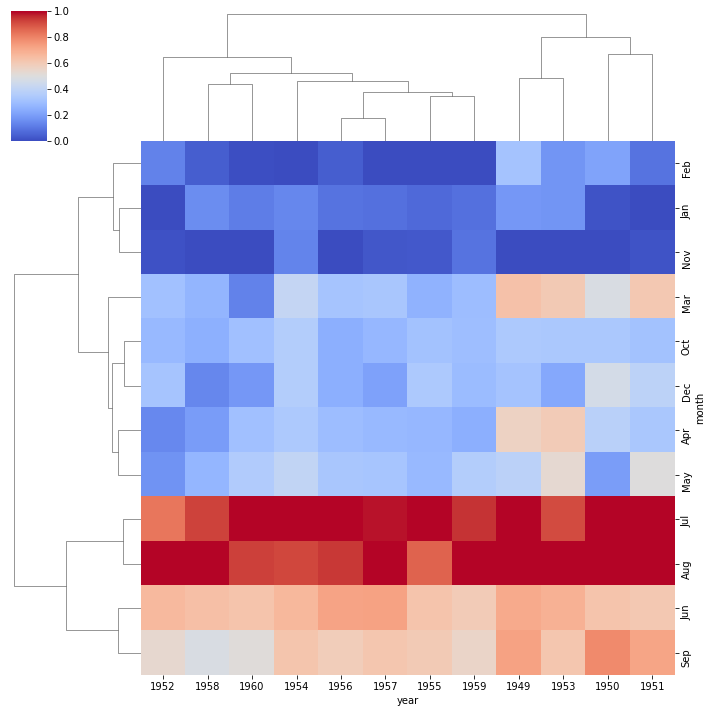

In [43]:
sns.clustermap(fp, cmap = 'coolwarm',standard_scale = 1)

***04 - Grids***

In [1]:
import seaborn as sns
%matplotlib inline
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


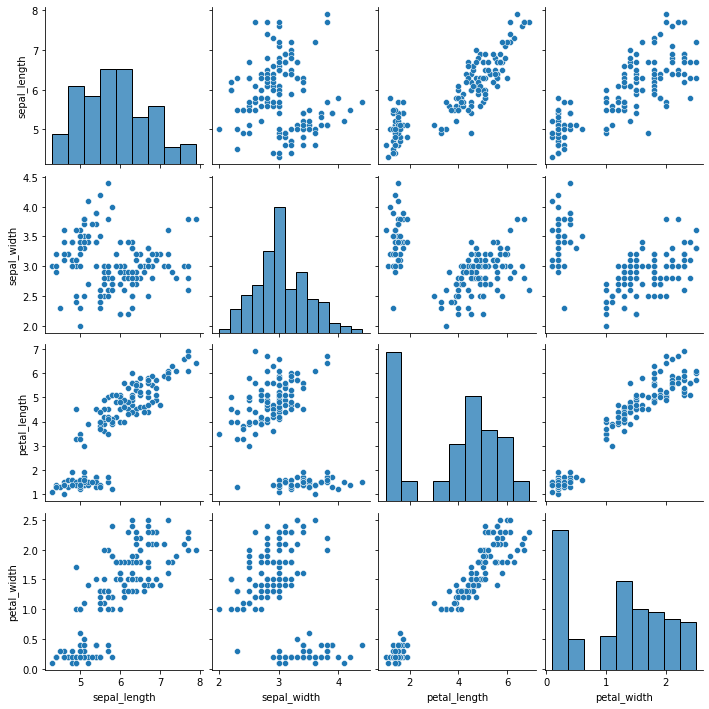

In [3]:
sns.pairplot(iris)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

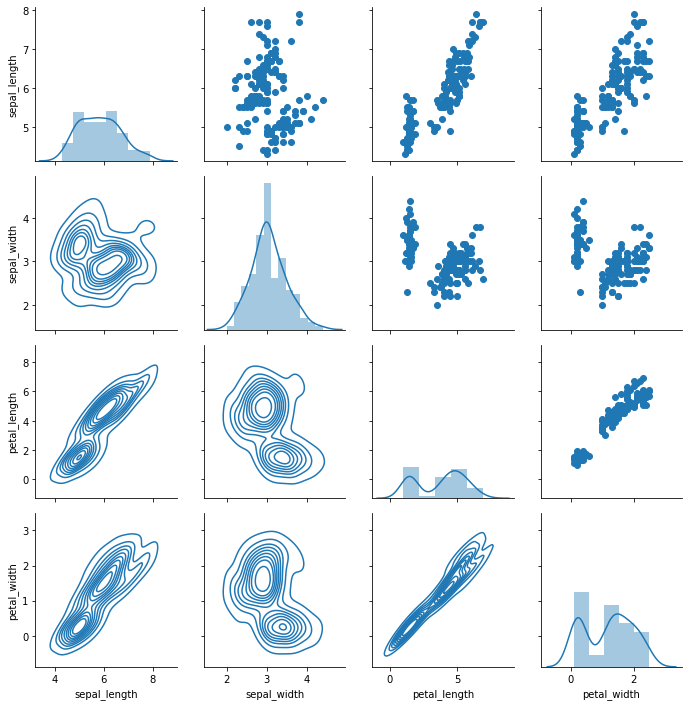

In [9]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

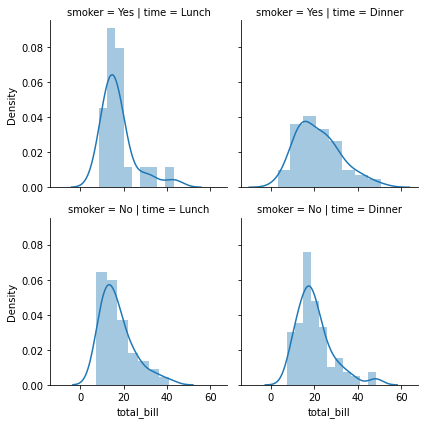

In [13]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(sns.distplot,'total_bill')

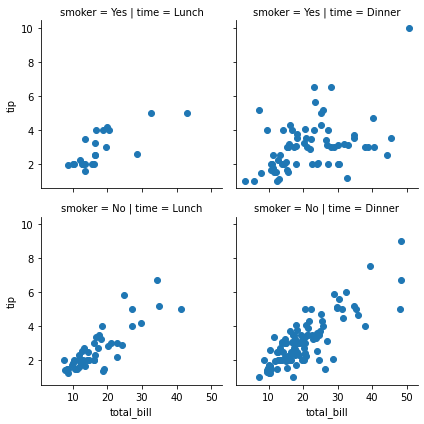

In [14]:
g = sns.FacetGrid(data = tips, col = 'time', row = 'smoker')
g.map(plt.scatter,'total_bill','tip')

***05 - Regression Plots***

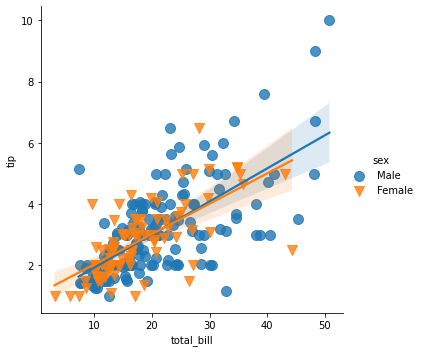

In [18]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex',markers = ['o','v'],
           scatter_kws = {'s':100})   # change the size of the markers

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


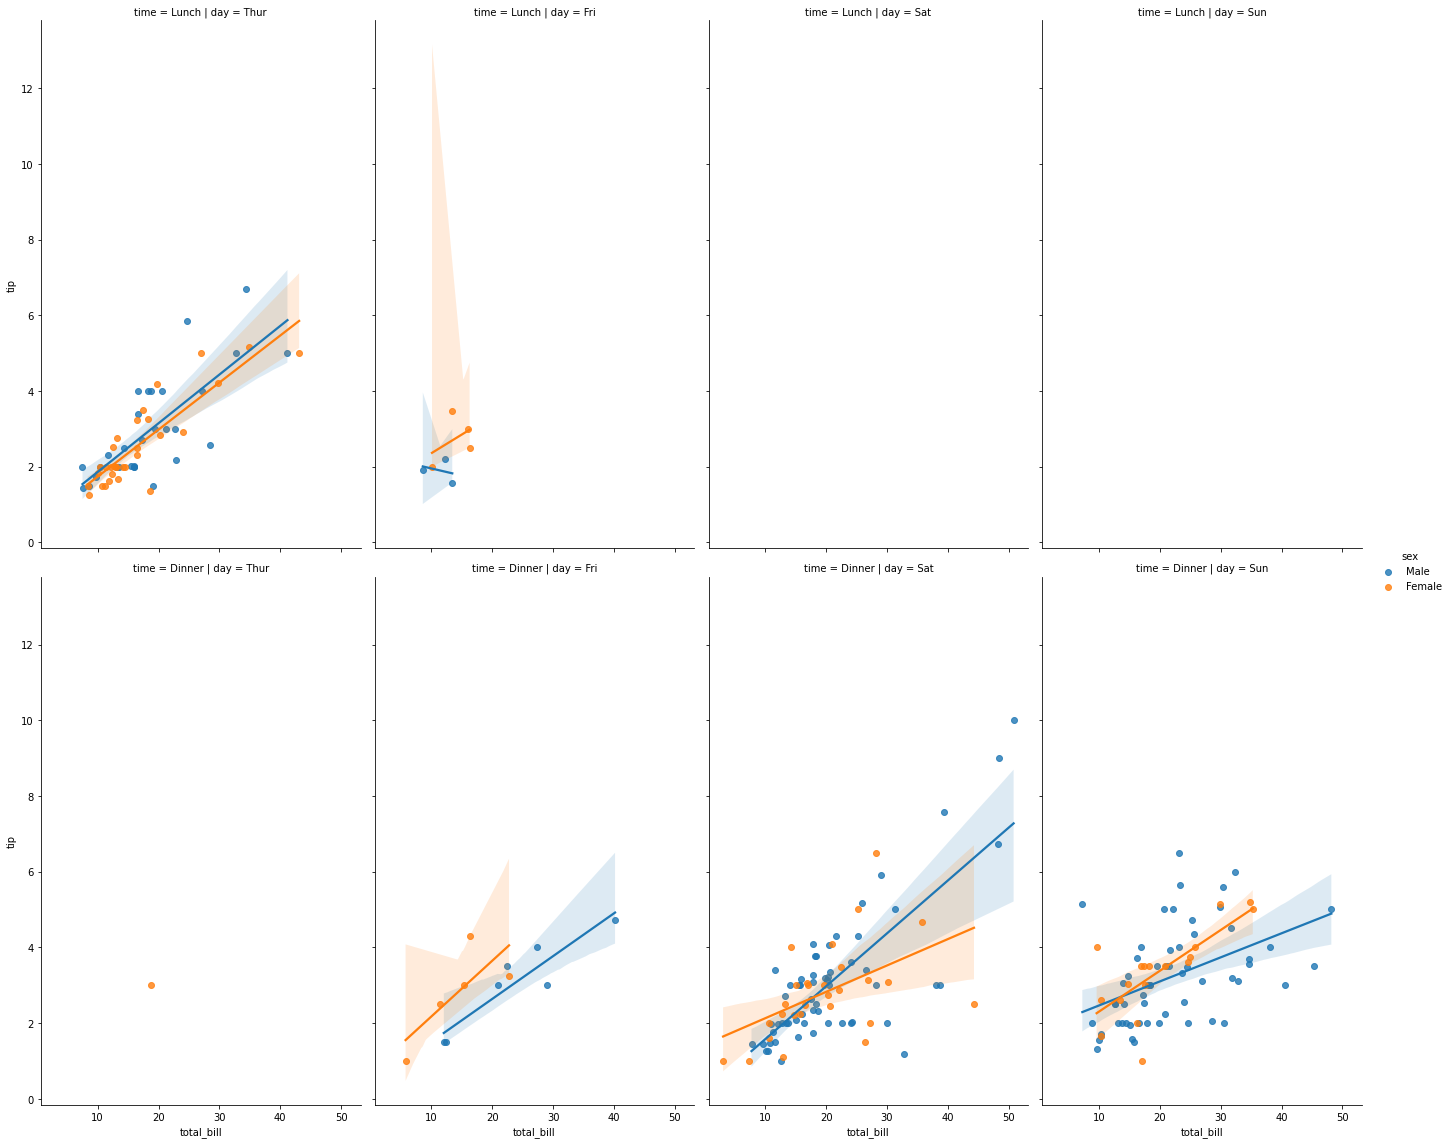

In [22]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', row ='time', hue = 'sex',
           aspect = 0.6, size = 8)

***06 - Style and Color***

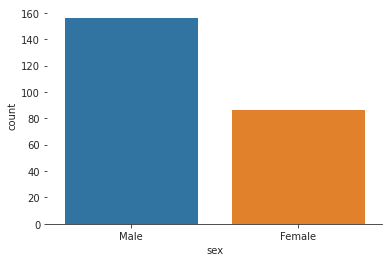

In [32]:
sns.set_style('ticks')
sns.countplot(x = 'sex', data = tips)
sns.despine(left = True)

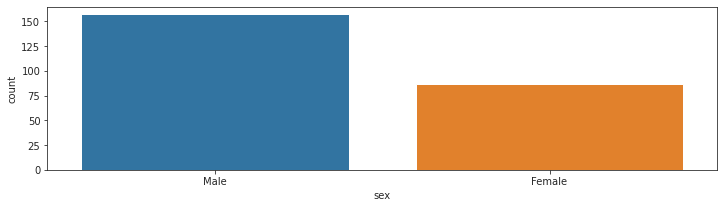

In [33]:
plt.figure(figsize = (12,3))
sns.countplot(x = 'sex',data = tips)

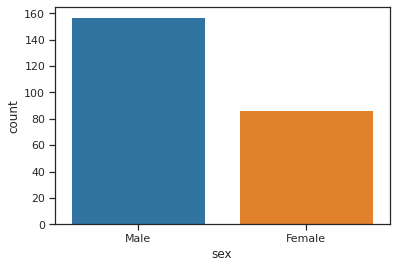

In [35]:
sns.set_context('notebook')
sns.countplot(x = 'sex', data = tips)

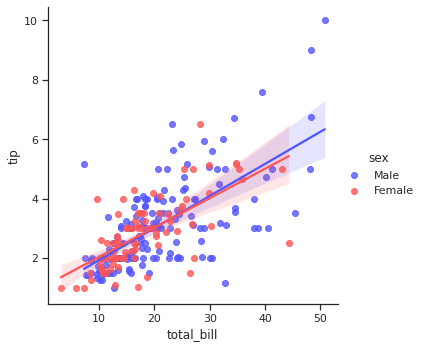

In [38]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'seismic')